In [1]:
#Import dependencies
import os
import plaid
import requests
import datetime
import json
import pandas as pd
%matplotlib inline

In [2]:
def pretty_print_response(response):
    print(json.dumps(response, indent=4, sort_keys=True))

In [3]:
#Import env variables
PLAID_CLIENT_ID = os.getenv('PLAID_CLIENT_ID')
PLAID_SBX_SECRET_KEY = os.getenv('PLAID_SBX_SECRET_KEY')
PLAID_PUBLIC_KEY = os.getenv('PLAID_PUBLIC_KEY')
PLAID_ENV = os.getenv('PLAID_ENV', 'sandbox')
PLAID_PRODUCTS = os.getenv('PLAID_PRODUCTS', 'transactions')

# Plaid Access Token

In this section, you will use the plaid-python api to generate the correct authentication tokens to access data in the free developer Sandbox. This mimics how you might connect to your own account or a customer account, but due to privacy issues, this homework will only require connecting to and analyzing the fake data from the developer sandbox that Plaid provides. 

Complete the following steps to generate an access token:
1. Create a client to connect to plaid
2. Use the client to generate a public token and request the following items: 
['transactions', 'income', 'assets']
3. Exchange the public token for an access token
4. Test the access token by requesting and printing the available test accounts

### 1. Create a client to connect to plaid

In [4]:
INSTITUTION_ID = "ins_109508"

In [5]:
# Create client object
client = plaid.Client(client_id=PLAID_CLIENT_ID, secret=PLAID_SBX_SECRET_KEY, public_key=PLAID_PUBLIC_KEY, environment='sandbox')

### 2. Generate a public token

In [6]:
create_tkn_response = client.Sandbox.public_token.create(INSTITUTION_ID, ['transactions','income','assets'])

### 3. Exchange the public token for an access token

In [7]:
exchange_response = client.Item.public_token.exchange(create_tkn_response['public_token'])
access_token = exchange_response['access_token']

### 4. Fetch Accounts

In [8]:
client.Accounts.get(access_token)

{'accounts': [{'account_id': 'qeR49DqRxztmK4lQLvyaSmkN37mbMzSdMN5Zo',
   'balances': {'available': 100,
    'current': 110,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '0000',
   'name': 'Plaid Checking',
   'official_name': 'Plaid Gold Standard 0% Interest Checking',
   'subtype': 'checking',
   'type': 'depository'},
  {'account_id': 'KBn3Zdyn5xhK3L9P8VmQH19Mqn1oz8cVNGjLK',
   'balances': {'available': 200,
    'current': 210,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '1111',
   'name': 'Plaid Saving',
   'official_name': 'Plaid Silver Standard 0.1% Interest Saving',
   'subtype': 'savings',
   'type': 'depository'},
  {'account_id': 'rQJN9DKJdBCgroWlpV1NhjvadDjxMeilMaXnG',
   'balances': {'available': None,
    'current': 1000,
    'iso_currency_code': 'USD',
    'limit': None,
    'unofficial_currency_code': None},
   'mask': '2222',
   'name': 'Plaid CD',
   'officia

---

# Account Transactions with Plaid

In this section, you will use the Plaid Python SDK to connect to the Developer Sandbox account and grab a list of transactions. You will need to complete the following steps:


1. Use the access token to fetch the transactions for the last 90 days
2. Print the categories for each transaction type
3. Create a new DataFrame using the following fields from the JSON transaction data: `date, name, amount, category`. (For categories with more than one label, just use the first category label in the list)
4. Convert the data types to the appropriate types (i.e. datetimeindex for the date and float for the amount)

### 1. Fetch the Transactions for the last 90 days

In [9]:
# Get transactions for institution for specific date range
start_date = '{:%Y-%m-%d}'.format(datetime.datetime.now() + datetime.timedelta(-90))
end_date = '{:%Y-%m-%d}'.format(datetime.datetime.now())

# Get transactions for date range
transaction_response = client.Transactions.get(access_token,start_date,end_date)

# Print JSON output
print(json.dumps(transaction_response['transactions'][:1],indent=4, sort_keys=True)) 

[
    {
        "account_id": "KBn3Zdyn5xhK3L9P8VmQH19Mqn1oz8cVNGjLK",
        "account_owner": null,
        "amount": 25,
        "authorized_date": null,
        "category": [
            "Payment",
            "Credit Card"
        ],
        "category_id": "16001000",
        "date": "2020-04-15",
        "iso_currency_code": "USD",
        "location": {
            "address": null,
            "city": null,
            "country": null,
            "lat": null,
            "lon": null,
            "postal_code": null,
            "region": null,
            "store_number": null
        },
        "name": "CREDIT CARD 3333 PAYMENT *//",
        "payment_channel": "other",
        "payment_meta": {
            "by_order_of": null,
            "payee": null,
            "payer": null,
            "payment_method": null,
            "payment_processor": null,
            "ppd_id": null,
            "reason": null,
            "reference_number": null
        },
        "pending": fals

### 2. Print the categories for each transaction

In [10]:
#Print category by parsing 
transaction_category=[]
transaction_name=[]
transaction_amount=[]
transaction_date=[]

for transactions in transaction_response['transactions']:
    transaction_category.append(json.dumps(transactions['category'][0]))
    transaction_name.append(json.dumps(transactions['name']))
    transaction_amount.append(json.dumps(str(transactions['amount'])))
    transaction_date.append(json.dumps(transactions['date']))

### 3. Create a new DataFrame using the following fields from the JSON transaction data: date, name, amount, category. 

(For categories with more than one label, just use the first category label in the list)

In [11]:
#Create the dataframe
df=pd.DataFrame([transaction_name, transaction_date, transaction_amount, transaction_category]).T
df.columns = ["Name", "Date", "Amount", "Category"]
df.head()

,Name,Date,Amount,Category
0,"""CREDIT CARD 3333 PAYMENT *//""","""2020-04-15""","""25""","""Payment"""
1,"""Uber""","""2020-04-15""","""5.4""","""Travel"""
2,"""ACH Electronic CreditGUSTO PAY 123456""","""2020-04-14""","""5850""","""Transfer"""
3,"""CD DEPOSIT .INITIAL.""","""2020-04-14""","""1000""","""Transfer"""
4,"""Touchstone Climbing""","""2020-04-13""","""78.5""","""Recreation"""


### 4. Convert the data types to the appropriate types 

(i.e. datetimeindex for the date and float for the amount)

In [12]:
#Drop quotes from entire dataframe
df['Name'] = df['Name'].str.replace('"', '')
df['Date'] = df['Date'].str.replace('"', '')
df['Amount'] = df['Amount'].str.replace('"', '')
df['Category'] = df['Category'].str.replace('"', '')
df.head()

,Name,Date,Amount,Category
0,CREDIT CARD 3333 PAYMENT *//,2020-04-15,25,Payment
1,Uber,2020-04-15,5.4,Travel
2,ACH Electronic CreditGUSTO PAY 123456,2020-04-14,5850,Transfer
3,CD DEPOSIT .INITIAL.,2020-04-14,1000,Transfer
4,Touchstone Climbing,2020-04-13,78.5,Recreation


In [13]:
#Convert amount to float
df['Amount'] = df['Amount'].astype(float)
df.head()

,Name,Date,Amount,Category
0,CREDIT CARD 3333 PAYMENT *//,2020-04-15,25.0,Payment
1,Uber,2020-04-15,5.4,Travel
2,ACH Electronic CreditGUSTO PAY 123456,2020-04-14,5850.0,Transfer
3,CD DEPOSIT .INITIAL.,2020-04-14,1000.0,Transfer
4,Touchstone Climbing,2020-04-13,78.5,Recreation


---

In [15]:
#Convert Date column to datetime format
df["Date"] = df["Date"].apply(pd.to_datetime)
df.head(50)

,Name,Date,Amount,Category
0,CREDIT CARD 3333 PAYMENT *//,2020-04-15,25.00,Payment
1,Uber,2020-04-15,5.40,Travel
2,ACH Electronic CreditGUSTO PAY 123456,2020-04-14,5850.00,Transfer
3,CD DEPOSIT .INITIAL.,2020-04-14,1000.00,Transfer
4,Touchstone Climbing,2020-04-13,78.50,Recreation
5,United Airlines,2020-04-13,-500.00,Travel
6,McDonald's,2020-04-12,12.00,Food and Drink
7,Starbucks,2020-04-12,4.33,Food and Drink
8,SparkFun,2020-04-11,89.40,Food and Drink
9,INTRST PYMNT,2020-04-10,-4.22,Transfer


# Income Analysis with Plaid

In this section, you will use the Plaid Sandbox to complete the following:
1. Determine the previous year's gross income and print the results
2. Determine the current monthly income and print the results
3. Determine the projected yearly income and print the results

In [26]:
#Retreive income response
income_response = client.Income.get(access_token)

# Print JSON output
print(income_response)

{'income': {'income_streams': [{'confidence': 0.99, 'days': 720, 'monthly_income': 500, 'name': 'UNITED AIRLINES'}], 'last_year_income': 6000, 'last_year_income_before_tax': 7285, 'max_number_of_overlapping_income_streams': 1, 'number_of_income_streams': 1, 'projected_yearly_income': 6085, 'projected_yearly_income_before_tax': 7389}, 'request_id': 'F9IPGlg8ohXqF3P'}


**Determine gross income**
Gross income for the previous year was $7,285

**Determine monthly income**
Current monthly income is $500 per month

**Determine projected yearly income**
Projected yearly income is $6,085

---

# Budget Analysis
In this section, you will use the transactions DataFrame to analyze the customer's budget

1. Calculate the total spending per category and print the results (Hint: groupby or count transactions per category)
2. Generate a bar chart with the number of transactions for each category 
3. Calculate the expenses per month
4. Plot the total expenses per month

### Calculate the expenses per category

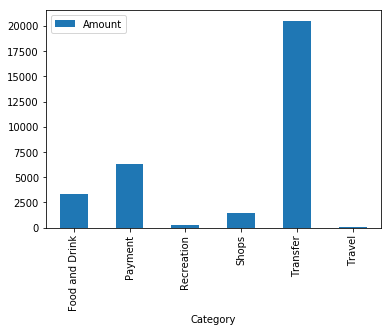

In [29]:
#Calculate total spending per category and plot
df.groupby('Category').sum().plot(kind='bar')

### Calculate the expenses per month

In [35]:
#Make new column for month
df['Month'] = pd.to_datetime(df['Date']).dt.strftime('%m')
df.head()

,Name,Date,Amount,Category,Month
0,CREDIT CARD 3333 PAYMENT *//,2020-04-15,25.0,Payment,04
1,Uber,2020-04-15,5.4,Travel,04
2,ACH Electronic CreditGUSTO PAY 123456,2020-04-14,5850.0,Transfer,04
3,CD DEPOSIT .INITIAL.,2020-04-14,1000.0,Transfer,04
4,Touchstone Climbing,2020-04-13,78.5,Recreation,04


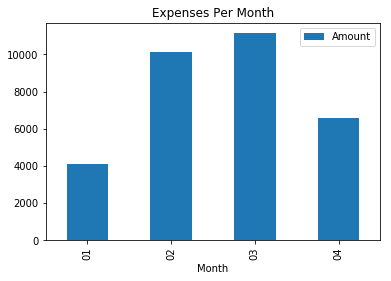

In [37]:
#Calculate expenses per month and plot
df.groupby('Month').sum().plot(kind='bar', title='Expenses Per Month')